# Financial Fraud Detection

Technology is growing exponentially everyday, and this advancement is affecting each and every major business sector. It is very evident that this is the digital age and business interactions have completely changed.

The increasing demand for digital banking experience by the customers has completely changed the way in which the banking sector operates. Mobile Banking has its hand in almost every aspect of the banking industry.

Most of our transactions nowadays, be it account transfer, making deposits, monitoring our spendings and earnings are done through Mobile Banking. All your transactions are just a click away, which seemed very unlikely a few years ago. 

It seems everything’s great, is it ?

One of the major concerns that consumers have with digital banking is security. The fear of data breach or any kind of fraud increases the need for services that keep user’s data secure and be fraud proof.The financial services industry and the industries that involve financial transactions are suffering from fraud-related losses and damages.

So, the challenge for industry players is to implement real-time claim assessment and improve the accuracy of fraud detection.


## Problem Statement:

Can we predict whether there has been a fraudulent transaction using Machine Learning techniques?

Steps:

    1. Exploratory Data Analysis
    2. Data Cleaning
    3. Feature Engineering
    4. Data Visualization
    5. Machine Learning Approach to detect fraud
    6. Model Improvement


## Data :

Transactional data containing more than 6 million rows has been provided. All the transactions have been done through mobile banking. It contains 11 columns, and the description of each of the column has been provided below:

This is a sample of 1 row with headers explanation:
1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

    • step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
    • type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
    • amount - amount of the transaction in local currency.
    • nameOrig - customer who started the transaction
    • oldbalanceOrg - initial balance before the transaction
    • newbalanceOrig - new balance after the transaction
    • nameDest - customer who is the recipient of the transaction
    • oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
    • newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
    • isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
    • isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


In [52]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,recall_score,f1_score,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mlxtend.classifier import StackingClassifier
import datetime
import time
import swifter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks 
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.combine import SMOTETomek
from collections import Counter

In [53]:
# Loading the data

data=pd.read_csv('./Data/data.csv',sep=',')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [54]:
# Checking the columns and its type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [55]:
# Checking for any missing values in the data

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [56]:
# Checking the transaction types and its frequency

data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [57]:
# Adding new column to convert step into datetime

data['DateTime'] = ""

In [58]:
# Function to convert hours to a datetime starting 01 Jan 2020

def addHours(h) :
    return datetime.datetime(2020, 1, 1,00,00,00) + datetime.timedelta(hours=h)

In [59]:
# Updating the new datetime value

data['DateTime'] = data['step'].swifter.apply(lambda x: addHours(x))

In [60]:
# Checking the number of unique destination customers and its frequency

data.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
C248609774     101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
C977993101      96
C97730845       96
C392292416      95
C1899073220     92
C306206744      91
C1782113663     90
C1234776885     90
C998351292      89
C716083600      89
C909295153      88
C1674899618     86
C667346055      86
C1262822392     85
C453211571      84
C1816757085     84
C1255024717     84
C2006081398     83
C991363637      82
C932583850      82
C1504109395     82
              ... 
M1958970210      1
M304137807       1
M209106583       1
M1244090254      1
M227338876       1
M97729756        1
M1322970273      1
M2088385975      1
M549395075       1
M584043684       1
M1507728281      1
M1031228696      1
M1600651742      1
M44994681        1
M1988289100      1
M926193329       1
M1101014677      1
M1629151312      1
M593642357       1
M1060773602      1
M1660780629      1
M1691920608 

In [61]:
# Looking at some of the fraud transactions

data[(data['nameDest'] == "C1504109395") & (data['isFraud'] == 1)]
data[(data['nameDest'] == "C1286084959")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DateTime
93,1,TRANSFER,583848.46,C1839168128,0.00,0.00,C1286084959,667778.00,2107778.11,0,0,2020-01-01 01:00:00
367,1,TRANSFER,176334.26,C169880779,45136.00,0.00,C1286084959,1251626.46,2107778.11,0,0,2020-01-01 01:00:00
388,1,CASH_OUT,373068.26,C1047934137,20034.00,0.00,C1286084959,1427960.73,2107778.11,0,0,2020-01-01 01:00:00
471,1,CASH_IN,403418.39,C848097505,3834666.95,4238085.34,C1286084959,1801028.99,2107778.11,0,0,2020-01-01 01:00:00
642,1,CASH_IN,222126.95,C870322840,6688712.64,6910839.59,C1286084959,1397610.60,2107778.11,0,0,2020-01-01 01:00:00
659,1,CASH_IN,317393.38,C1197721383,8906617.38,9224010.75,C1286084959,1175483.65,2107778.11,0,0,2020-01-01 01:00:00
701,1,CASH_OUT,18288.91,C1049590050,0.00,0.00,C1286084959,858090.28,2107778.11,0,0,2020-01-01 01:00:00
803,1,TRANSFER,483544.30,C593447952,0.00,0.00,C1286084959,876379.19,2107778.11,0,0,2020-01-01 01:00:00
841,1,CASH_OUT,607616.73,C1267042315,0.00,0.00,C1286084959,1359923.49,2107778.11,0,0,2020-01-01 01:00:00
1157,1,TRANSFER,789419.02,C883678948,0.00,0.00,C1286084959,1967540.22,2107778.11,0,0,2020-01-01 01:00:00


In [62]:
data[(data['nameOrig'] == "C1286084959")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DateTime


In [63]:
data[data['isFraud'] == 1]['nameDest'].value_counts()

C1981613973    2
C1013511446    2
C644163395     2
C2020337583    2
C803116137     2
C643624257     2
C1185292292    2
C964377943     2
C475338087     2
C1366192319    2
C104038589     2
C1655359478    2
C1193568854    2
C1650668671    2
C1259079602    2
C185805228     2
C1780714769    2
C1601170327    2
C1399829166    2
C967226405     2
C1653587362    2
C1325541393    2
C410033330     2
C686334805     2
C1497532505    2
C1656842502    2
C14138104      2
C1669818195    2
C935310781     2
C1148781766    2
              ..
C1310890311    1
C1818578637    1
C1273182282    1
C1135493559    1
C1947200265    1
C1312240019    1
C1309332634    1
C627099029     1
C1848415041    1
C1512688061    1
C648043949     1
C122914320     1
C1571003117    1
C1072055067    1
C1482453836    1
C1367862566    1
C2080388513    1
C117267228     1
C1552047052    1
C1789053993    1
C1293054984    1
C641615589     1
C1185249174    1
C1661087818    1
C1674571647    1
C256417920     1
C1469065727    1
C1630931168   

In [64]:
data[(data['nameOrig'] == "C1364913072") | (data['nameDest'] == "C1364913072")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DateTime
1870,1,CASH_OUT,25071.46,C1275464847,25071.46,0.00,C1364913072,9083.76,34155.22,1,0,2020-01-01 01:00:00
2459,1,CASH_OUT,14166.38,C1018742990,595572.48,581406.10,C1364913072,34155.22,47409.85,0,0,2020-01-01 01:00:00
2653,1,CASH_IN,911.76,C566760932,1335635.48,1336547.24,C1364913072,48321.60,47409.85,0,0,2020-01-01 01:00:00
3836,3,CASH_IN,26279.17,C21252030,106458.00,132737.17,C1364913072,47409.85,21130.68,0,0,2020-01-01 03:00:00
4746,4,CASH_OUT,8502.55,C1895102622,0.00,0.00,C1364913072,21130.68,29633.23,0,0,2020-01-01 04:00:00
55908,9,TRANSFER,1587594.01,C269162291,10086.00,0.00,C1364913072,29633.23,4979624.69,0,0,2020-01-01 09:00:00
66866,9,TRANSFER,1245281.40,C1795683131,0.00,0.00,C1364913072,1617227.24,4979624.69,0,0,2020-01-01 09:00:00
69311,9,TRANSFER,1316722.50,C1485678046,0.00,0.00,C1364913072,2862508.64,4979624.69,0,0,2020-01-01 09:00:00
76149,10,CASH_OUT,579202.75,C1058587741,0.00,0.00,C1364913072,4179231.15,4979624.69,0,0,2020-01-01 10:00:00
76211,10,CASH_OUT,221190.79,C1135683604,631387.17,410196.38,C1364913072,4758433.90,4979624.69,0,0,2020-01-01 10:00:00


In [65]:
# Creating derived columns which checks the balance mismatch at both source and destination end

data['Orgbalmismatch'] = abs((data['oldbalanceOrg'] - data['newbalanceOrig']).round(2)) != data['amount']
data['Destbalmismatch'] = (abs((data['oldbalanceDest'] - data['newbalanceDest']).round(2)) != data['amount']) & (data['nameDest'].str[:1] != 'M')

In [66]:
# Checking the original balance check when destination account has balance mismatch before and after transaction

data[data['Destbalmismatch'] == True]['Orgbalmismatch'].value_counts()

True     819830
False    618420
Name: Orgbalmismatch, dtype: int64

In [67]:
# Checking the original balance frequency when both source & destination account has balance mismatch before and after transaction

data[(data['Destbalmismatch'] == True) & (data['Orgbalmismatch'] == True)]['Orgbalmismatch'].value_counts()

True    819830
Name: Orgbalmismatch, dtype: int64

In [68]:
# Checking the frauds when destination account is not merchant

data[(data['Orgbalmismatch'] == True) & (data['nameDest'].str[:1] != "M") & (data['isFraud'] == 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DateTime,Orgbalmismatch,Destbalmismatch
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1,0,2020-01-01 01:00:00,True,True
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.00,132842.64,1,0,2020-01-01 01:00:00,True,False
14861,8,CASH_OUT,181728.11,C2102265902,0.00,0.00,C789014007,11397.00,184477.77,1,0,2020-01-01 08:00:00,True,True
25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.00,C277510102,0.00,970749.68,1,0,2020-01-01 08:00:00,True,True
77745,10,CASH_OUT,277970.88,C489647033,0.00,0.00,C571514738,0.00,277970.88,1,0,2020-01-01 10:00:00,True,False
138559,11,TRANSFER,1933920.80,C1706582969,0.00,0.00,C461905695,1283762.85,3217683.65,1,0,2020-01-01 11:00:00,True,False
169998,12,CASH_OUT,149668.66,C227115333,0.00,0.00,C460735540,44170.11,193838.76,1,0,2020-01-01 12:00:00,True,True
178668,12,CASH_OUT,222048.71,C265790428,0.00,0.00,C1700442291,2979.00,225027.71,1,0,2020-01-01 12:00:00,True,False
200845,13,CASH_OUT,454859.39,C1274887619,0.00,0.00,C2146670328,0.00,454859.39,1,0,2020-01-01 13:00:00,True,False
217978,13,TRANSFER,123194.95,C2143112877,79466.45,0.00,C1755380031,535933.16,263908.84,1,0,2020-01-01 13:00:00,True,True


In [69]:
# Checking the frauds when destination account is a merchant

data[(data['nameDest'].str[:1] == "M") & (data['isFraud'] == 1)]
# data[(data['nameOrig'].str[:1] == "M")]['nameDest'].value_counts()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DateTime,Orgbalmismatch,Destbalmismatch


In [70]:
# Getting the hour value from the datetime

data['Hour'] = ""

In [71]:
data['Hour'] = data['DateTime'].swifter.apply(lambda x : x.hour)

In [72]:
# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

In [73]:
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col

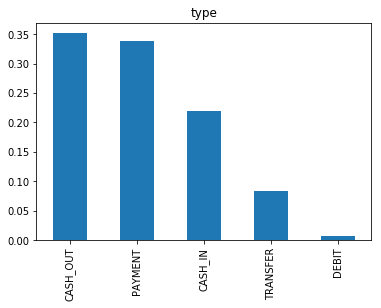

In [ ]:
# Function to perform univariate analysis of categorical columns

def plot_categorical_columns(dataframe):
    categorical_columns = categorical_features(dataframe)
    dataframe = dataframe[categorical_columns]
    for i in dataframe:
        plt.title(i)
        dataframe[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()

plot = plot_categorical_columns(data)


In [ ]:
# Function to perform univariate analysis of continuous columns

# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(data)            
plot_box_plots(data)


In [ ]:
# Function to plot bivariate categorical columns

def bivariate_analysis_categorical(dataframe,target):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(exclude=np.number).columns:
            sns.countplot(x=dataframe[col],hue=target,data=dataframe)
            plt.xticks(rotation='vertical')
            plt.show()

bivariate_analysis_categorical(data,'isFraud')

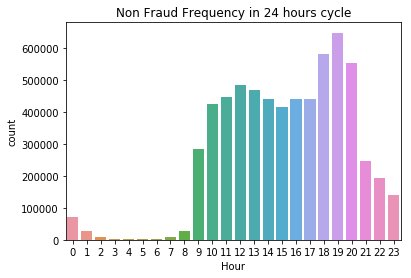

In [74]:
# Plotting the Non Fraud pattern across 24 hour cycle

sns.countplot(x=data[data['isFraud']==0]['Hour'],data=data)
# plt.xticks(rotation='vertical')
plt.title('Non Fraud Frequency in 24 hours cycle')
plt.savefig('Non Fraud Frequency.png')
plt.show()

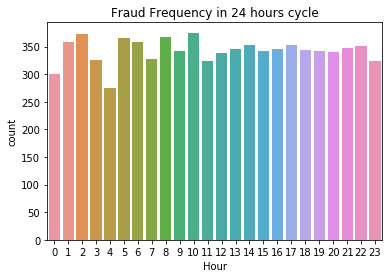

In [75]:
# Plotting the Fraud pattern across 24 hour cycle

sns.countplot(x=data[data['isFraud']==1]['Hour'],data=data)
# plt.xticks(rotation='vertical')
plt.title('Fraud Frequency in 24 hours cycle')
plt.savefig('Fraud Frequency.png')
plt.show()

In [76]:
Not_fraud = pd.pivot_table(data[data['isFraud']==0],values='step',columns='Hour',aggfunc='count')
fraud = pd.pivot_table(data[data['isFraud']==1],values='step',columns='Hour',aggfunc='count')

In [77]:
fraud

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
step,300,358,372,326,274,366,358,328,368,341,...,353,341,345,353,343,342,340,347,351,323


In [78]:
ratio = (fraud/Not_fraud)*100
a = ratio.columns.tolist()
b = list(ratio.values.flatten())
ratio
ratio_plot = pd.DataFrame()
ratio_plot['Hour']= a
ratio_plot['Percentage'] = b
ratio

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
step,0.420834,1.338168,4.302568,19.393218,28.335057,28.705882,11.691705,3.787529,1.386221,0.120419,...,0.080355,0.081903,0.078184,0.080302,0.059121,0.052821,0.06144,0.140225,0.180738,0.229185


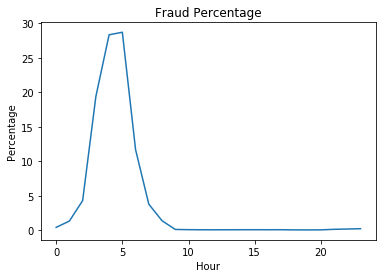

In [79]:
# Plotting the Fraud percentage pattern across 24 hour cycle

sns.lineplot(x='Hour',y='Percentage',data=ratio_plot)
plt.title('Fraud Percentage')
plt.savefig('Transaction Percentage Fraud.png')


In [80]:
Not_fraud_amount_mean = pd.pivot_table(data[data['isFraud']==0],values='amount',columns='Hour',aggfunc='mean')
Not_fraud_amount_mean

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
amount,122375.101255,105921.410121,98884.707929,172068.69257,115913.287673,105593.538502,93714.698579,116898.989188,156342.558808,200642.133669,...,187503.722358,210707.136984,233401.820783,195354.339112,155845.243035,148383.735048,134505.309488,134455.788405,133033.029529,124679.682447


In [81]:
fraud_amount_mean = pd.pivot_table(data[data['isFraud']==1],values='amount',columns='Hour',aggfunc='mean')
fraud_amount_mean

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
amount,1.364590e+06,1.024262e+06,1.882202e+06,1.928098e+06,1.243001e+06,1.373562e+06,1.246331e+06,1.007048e+06,1.688440e+06,1.211363e+06,...,1.839866e+06,1.195238e+06,1.500734e+06,1.627693e+06,1.432005e+06,1.197679e+06,1.456682e+06,1.957132e+06,1.782623e+06,1.433144e+06


In [82]:
fraud_amount_mean_transfer = pd.pivot_table(data[(data['isFraud']==1) & (data['type']=='TRANSFER')],values='step',columns='Hour',aggfunc='count')
fraud_amount_mean_transfer

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
step,150,178,186,163,137,183,179,164,184,171,...,175,169,172,176,170,171,170,173,175,162


In [83]:
fraud_amount_mean_cashout = pd.pivot_table(data[(data['isFraud']==1) & (data['type']=='CASH_OUT')],values='step',columns='Hour',aggfunc='count')
fraud_amount_mean_cashout

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
step,150,180,186,163,137,183,179,164,184,170,...,178,172,173,177,173,171,170,174,176,161


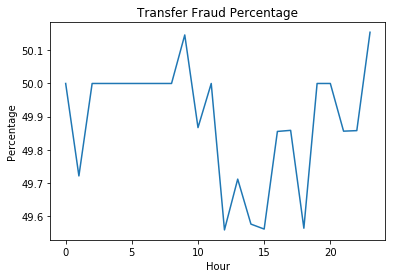

In [84]:
# Plotting the Transfer Fraud percentage pattern across 24 hour cycle

transfer_per = (fraud_amount_mean_transfer/fraud)*100
a = transfer_per.columns.tolist()
b = list(transfer_per.values.flatten())

transfer_per_plot = pd.DataFrame()
transfer_per_plot['Hour']= a
transfer_per_plot['Percentage'] = b
sns.lineplot(x='Hour',y='Percentage',data=transfer_per_plot)
plt.title('Transfer Fraud Percentage')
plt.savefig('Transfer Percentage Fraud.png')
plt.show()

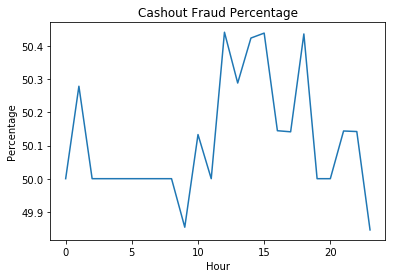

In [85]:
# Plotting the Cash out Fraud percentage pattern across 24 hour cycle


cashout_per = (fraud_amount_mean_cashout/fraud)*100
a = cashout_per.columns.tolist()
b = list(cashout_per.values.flatten())

cashout_per_plot = pd.DataFrame()
cashout_per_plot['Hour']= a
cashout_per_plot['Percentage'] = b
sns.lineplot(x='Hour',y='Percentage',data=cashout_per_plot)
plt.title('Cashout Fraud Percentage')
plt.savefig('Cashout Percentage Fraud.png')
plt.show()

In [86]:
Not_fraud_amount_sum = pd.pivot_table(data[data['isFraud']==0],values='amount',columns='Hour',aggfunc='sum')
Not_fraud_amount_sum
a = Not_fraud_amount_sum.columns.tolist()
b = list(Not_fraud_amount_sum.values.flatten())
ratio_plot['Total Non Fraud Amount'] = b

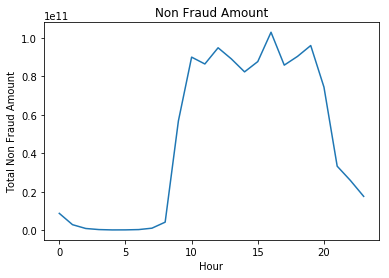

In [87]:
# Plotting the Non Fraud Amount pattern across 24 hour cycle

sns.lineplot(x='Hour',y='Total Non Fraud Amount',data=ratio_plot)
plt.title('Non Fraud Amount')
plt.savefig('Non Fraud Amount.png')
plt.show()

In [88]:
fraud_amount_sum = pd.pivot_table(data[data['isFraud']==1],values='amount',columns='Hour',aggfunc='sum')
fraud_amount_sum
a = fraud_amount_sum.columns.tolist()
b = list(fraud_amount_sum.values.flatten())
ratio_plot['Total Fraud Amount'] = b

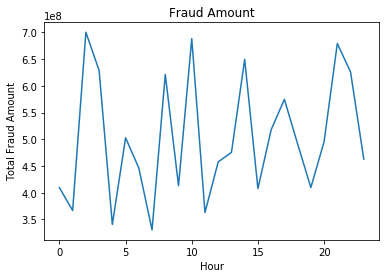

In [89]:
# Plotting the Fraud Amount pattern across 24 hour cycle

sns.lineplot(x='Hour',y='Total Fraud Amount',data=ratio_plot)
plt.title('Fraud Amount')
plt.savefig('Fraud Amount.png')
plt.show()

In [90]:
# Checking whether source customer present in destination customer and vise versa

data['nameOrig'].isin(data['nameDest']).value_counts()

False    6360849
True        1771
Name: nameOrig, dtype: int64

In [91]:
data[data['nameDest'].isin(data['nameOrig'])]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DateTime,Orgbalmismatch,Destbalmismatch,Hour
559,1,TRANSFER,100588.80,C1636588948,18913.68,0.00,C2050019814,105223.00,0.00,0,0,2020-01-01 01:00:00,True,True,1
862,1,CASH_OUT,171757.76,C1673916398,0.00,0.00,C2050019814,205811.80,0.00,0,0,2020-01-01 01:00:00,True,True,1
1262,1,CASH_IN,35492.20,C1540476618,444567.92,480060.12,C2050019814,377569.57,0.00,0,0,2020-01-01 01:00:00,False,True,1
1307,1,CASH_IN,82564.24,C322830747,6739112.35,6821676.59,C2050019814,342077.36,0.00,0,0,2020-01-01 01:00:00,False,True,1
1321,1,CASH_IN,170207.14,C1816468636,8335475.31,8505682.45,C2050019814,259513.13,0.00,0,0,2020-01-01 01:00:00,False,True,1
3534,2,DEBIT,4390.62,C571251299,69336.00,64945.38,C1360393616,4820.00,0.00,0,0,2020-01-01 02:00:00,False,True,2
5699,6,DEBIT,7821.80,C486965279,19353.00,11531.20,C1814361629,103160.00,110981.80,0,0,2020-01-01 06:00:00,False,False,6
7091,6,CASH_IN,88549.90,C2141744605,4320892.68,4409442.58,C668345982,107358.00,18808.10,0,0,2020-01-01 06:00:00,False,False,6
8572,7,CASH_IN,35884.67,C1359875538,2335651.45,2371536.12,C1814361629,71413.38,35528.72,0,0,2020-01-01 07:00:00,False,True,7
8781,7,CASH_IN,39717.52,C1661093955,86525.00,126242.52,C1360393616,0.00,0.00,0,0,2020-01-01 07:00:00,False,True,7


Highly Correlated Variables


oldbalanceDest  newbalanceDest    0.976569
newbalanceDest  oldbalanceDest    0.976569
newbalanceOrig  oldbalanceOrg     0.998803
oldbalanceOrg   newbalanceOrig    0.998803
dtype: float64

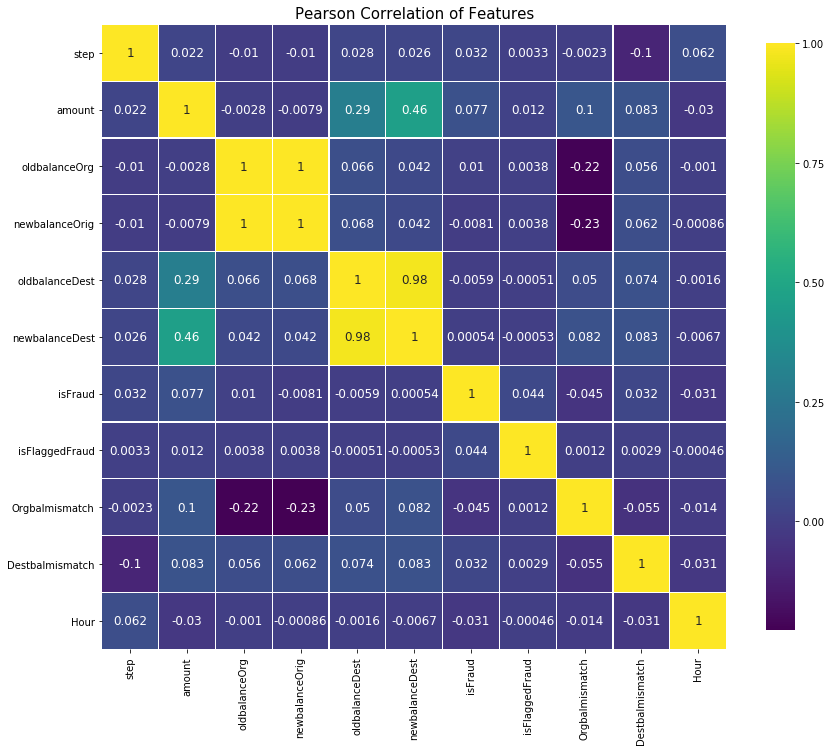

In [92]:
# Plotting the Pearson Correlation of Features

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.savefig('Heatmap.png')
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(data)

In [93]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset

data_Encoded = dummyEncode(data)

In [94]:
data_Encoded.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DateTime,Orgbalmismatch,Destbalmismatch,Hour
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,2020-01-01 01:00:00,False,False,1
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,2020-01-01 01:00:00,False,False,1
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,2020-01-01 01:00:00,False,True,1
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,2020-01-01 01:00:00,False,True,1
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,2020-01-01 01:00:00,False,False,1


In [95]:
# Rearranging the columns

data_Encoded = data_Encoded[['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFlaggedFraud',
 'DateTime',
 'Hour',
 'Orgbalmismatch',
 'Destbalmismatch','isFraud']]

In [96]:
data_Encoded.drop(['DateTime','isFlaggedFraud','type','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest'],axis=1,inplace=True)

In [97]:
# Scaling the data

scaler = StandardScaler()

In [98]:
data_Encoded['step'] = scaler.fit_transform(data_Encoded[['step']])
data_Encoded['amount'] = scaler.fit_transform(data_Encoded[['amount']])
data_Encoded['Orgbalmismatch'] = scaler.fit_transform(data_Encoded[['Orgbalmismatch']])
data_Encoded['Destbalmismatch'] = scaler.fit_transform(data_Encoded[['Destbalmismatch']])
data_Encoded['Hour'] = scaler.fit_transform(data_Encoded[['Hour']])

In [ ]:
# rus = RandomUnderSampler(random_state = 42) 
# X_res, y_res = rus.fit_resample(X, y) 
# X = pd.DataFrame(X_res) 
# y = pd.DataFrame(y_res)
# print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
# tl = TomekLinks(random_state = 42)
# X_res, y_res = tl.fit_resample(X, y) 
# X = pd.DataFrame(X_res) 
# y = pd.DataFrame(y_res)
# print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
# ros = RandomOverSampler(random_state = 42)
# X_res, y_res = ros.fit_resample(X, y) 
# X = pd.DataFrame(X_res) 
# y = pd.DataFrame(y_res)
# print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
# sm = SMOTE(random_state = 42)
# X_res, y_res = sm.fit_resample(X, y) 
# X = pd.DataFrame(X_res) 
# y = pd.DataFrame(y_res)
# print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
# smt = SMOTETomek(random_state = 42)
# X_res, y_res = smt.fit_resample(X, y) 
# X = pd.DataFrame(X_res) 
# y = pd.DataFrame(y_res)
# print('Resampled dataset shape %s' % Counter(y_res))

In [99]:
X = data_Encoded.iloc[:,:-1]
y = data_Encoded.iloc[:,-1]

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42, stratify = y)

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

(1272524,)
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)
Precision is 0.8487247141600703
Accuracy: 0.9993320361737774
F1 score: 0.6942446043165469
Recall Score: 0.5873402312842362
Confusion Matrix:

965 172
678 1270709


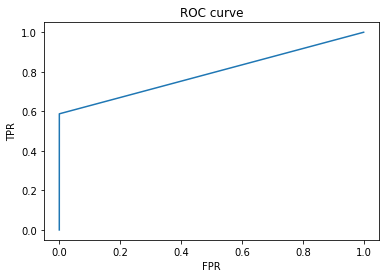

In [101]:
model = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=42,class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
print(y_pred.shape)
print(model)
print('Precision is',precision_score(y_test, y_pred,average='binary'))
print('Accuracy:',accuracy_score(y_test,y_pred))
print('F1 score:',f1_score(y_test,y_pred,average='binary'))
print('Recall Score:',recall_score(y_test,y_pred,average='binary'))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('Confusion Matrix:\n')
print(tp,fp)
print(fn,tn)
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()